# Temas Tratados en el Trabajo Práctico 4

* Representación del Conocimiento y Razonamiento Lógico.

* Estrategias de resolución de hipótesis: Encadenamiento hacia Adelante, Encadenamiento hacia Atrás y Resolución por Contradicción.

* Representación basada en circuitos.

## Ejercicios Teóricos

1. ¿Qué es una inferencia?

2. ¿Cómo se verifica que un modelo se infiere de la base de conocimientos?

3. Observe la siguiente base de conocimiento:

$R1: b ∧ c → a$

$R2: d ∧ e → b$

$R3: g ∧ e → b$

$R4: e → c$

$R5: d$

$R6: e$

$R7: a ∧ g → f$

        3.1 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia adelante? Este método solamente usa reglas ya incorporadas a la base de conocimiento para inferir la hipótesis, ¿qué propiedad debe tener el algoritmo para asegurar que esta inferencia sea posible?

        3.2 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia atrás? Este método asigna un valor de verdad a la hipótesis y deriva las sentencias de la base de conocimiento, ¿qué propiedad debe tener el algoritmo para asegurar que esta derivación sea posible?

        3.3 Exprese la base de conocimiento en su Forma Normal Conjuntiva. A continuación, demuestre por contradicción que $a = True$.

4. Diseñe con lógica proposicional basada en circuitos las proposiciones *OrientadoDerecha* y *Agente ubicado en la casilla [1,2]* para el mundo de wumpus de 4x4. Dibuje el circuito correspondiente.


5. El nonograma es un juego en el cual se posee un tablero en blanco y cada fila y columna presenta información sobre la longitud de un bloque en dicha fila/columna. Además, la leyenda puede indicar más de un número, indicando esto que existen varios bloques de las longitudes mostradas por la leyenda y en el mismo orden, separados por al menos un espacio vacío.

Resuelva el nonograma de la imagen de abajo escribiendo en primer lugar cada regla que puede incorporarse a la base de conocimientos inicial e incorporando cada inferencia que realice.

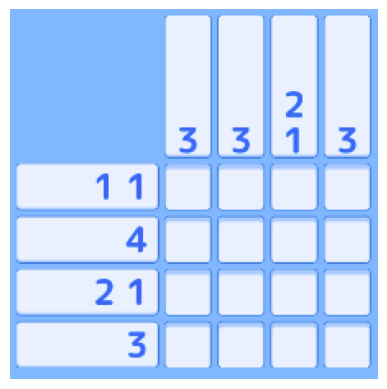

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1SKiXvrI_TX-U4sbw60TYSRmaNYyFixmI"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

## Ejercicios de Implementación

6. Implementar un motor de inferencia con encadenamiento hacia adelante. Pruébelo con las proposiciones del ejercicio 3.

7. Implementar un motor de inferencia con encadenamiento hacia atrás. Pruébelo con las proposiciones del ejercicio 3.

8. Implementar un motor de inferencia por contradicción que detecte si el conjunto de proposiciones del ejercicio 3 es inconsistente.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)